**Task Description**
> **By using the Titanic Dataset available on the Kaggle platform, and predict wether a passenger on boat survived or not.**





# Libraries

In [1]:
!pip install kaggle

In [2]:
import os
import shutil
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report


# Loading Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
! mkdir ~/.kaggle

In [5]:
! cp kaggle.json ~/.kaggle

In [6]:
! chmod 600 ~/.kaggle/kaggle.json

In [7]:
shutil.copy('/content/kaggle.json', '/root/kaggle.json')

'/root/kaggle.json'

In [8]:
!kaggle datasets download -d brendan45774/test-file -p /content --force

  0% 0.00/11.2k [00:00<?, ?B/s]
100% 11.2k/11.2k [00:00<00:00, 12.9MB/s]


In [9]:
!unzip test-file.zip

Archive:  test-file.zip
  inflating: tested.csv              


# Preprocessing Data  

In [10]:
df=pd.read_csv('/content/tested.csv')

In [11]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [12]:
df.shape

(418, 12)

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [14]:
dumpColumn=['PassengerId', 'Name', 'Ticket', 'Cabin']

In [15]:
df.drop(columns=dumpColumn,inplace=True)

In [16]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [17]:
Agemean=df['Age'].median()
df['Age'].fillna(Agemean,inplace=True)

Faremean=df['Fare'].median()
df['Fare'].fillna(Faremean,inplace=True)

# Visualize the Relationship

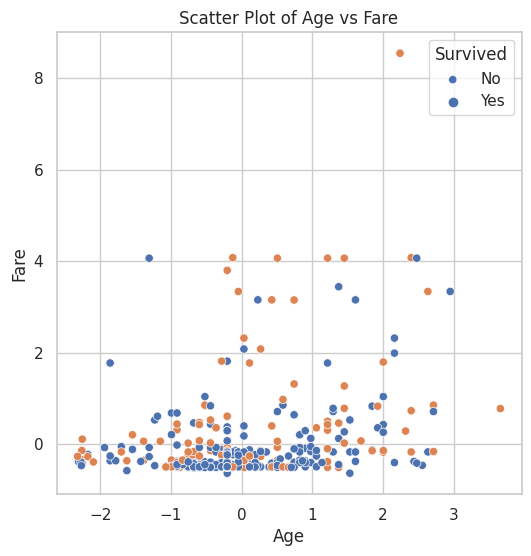

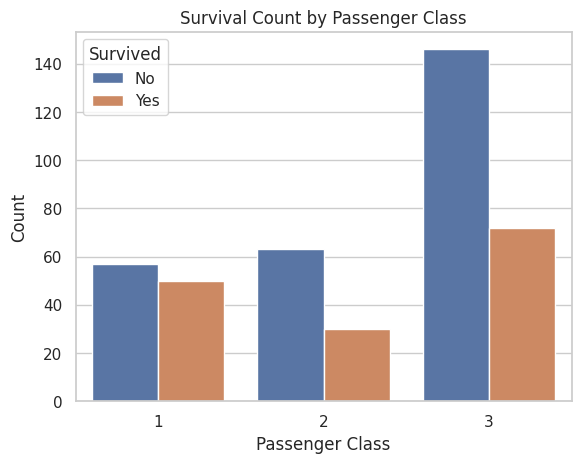

In [45]:
plt.figure(figsize=(6, 6))
sns.scatterplot(data=df, x='Age', y='Fare', hue='Survived')
plt.title('Scatter Plot of Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()


sns.countplot(data=df, x='Pclass', hue='Survived')
plt.title('Survival Count by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['No', 'Yes'])
plt.show()

In [18]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [19]:
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)


In [20]:
scaler=StandardScaler()

In [21]:
df[['Fare', 'Age']] = scaler.fit_transform(df[['Fare', 'Age']])


# Feature Extraction and Training


In [31]:
features = ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Embarked_Q', 'Embarked_S']
target = 'Survived'

In [32]:
x=df[features]
y=df[target]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# KNN Model

In [34]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)

# SVM Model

In [35]:
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)

#Navie Bayes Model

In [36]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

# Accuracy Comparison

In [28]:
knn_accuracy=accuracy_score(y_test,knn_predictions)
svm_accuracy=accuracy_score(y_test,svm_predictions)
nb_accuracy=accuracy_score(y_test,nb_predictions)

In [29]:
data = {
    'Model': ['K-Nearest Neighbors', 'Support Vector Machine', 'Naive Bayes'],
    'Accuracy': [knn_accuracy, svm_accuracy, nb_accuracy]
}

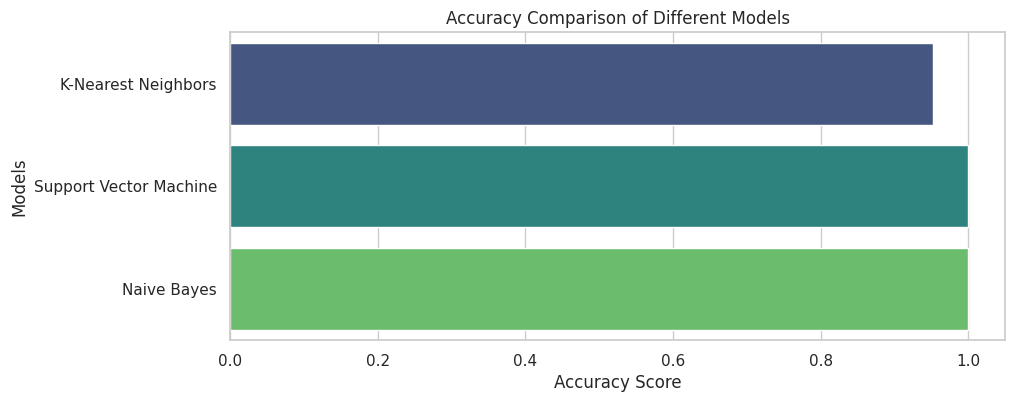

In [54]:
plt.figure(figsize=(10, 4))
sns.barplot(data=data, y='Model', x='Accuracy', orient='h', palette='viridis')
plt.xlabel('Accuracy Score')
plt.ylabel('Models')
plt.title('Accuracy Comparison of Different Models')
plt.show()

>**I will be going with Naive Bayes Model for predicting the survival of the passengers on board**


